## Assesing diad skewness
- This notebook uses the protocol of DeVitre et al. (in review) to assess diad skewness. This can be useful to identify liquid CO$_2$ in room temperature diad acqusitions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

## Set path, and filetype

In [2]:
filetype='headless_txt'
import os
spectra_path=os.getcwd()
file_ext='.txt'
exclude_str=['Ne']
Diad_Files=pf.get_diad_files(path=spectra_path, 
file_ext=file_ext, exclude_str=exclude_str)

Diad_Files

['G170_004_2_4_10MW_1800G_5S_5ACC (CRR).txt',
 'G170_004_2_4_5MW_1800G_10S_1ACC (CRR).txt',
 'G170_004_2_4_5MW_1800G_10S_3ACC (CRR).txt',
 'G170_004_2_4_10MW_1800G_5S_1ACC (CRR).txt',
 'G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR).txt',
 'G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR) (1).txt']

## Tweak fit for 1 file before you loop

In [3]:
filename=Diad_Files[0]
# Cut off intensity from peak to assess skewness
int_cut_off=0.3 
# Calculates absolute skewness, e.g., biggest possible value
skewness='abs'

In [4]:
diad1_config=pf.diad1_fit_config()
print(diad1_config)

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, fit_gauss=False, gauss_amp=1000, diad_sigma=0.2, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1300, 1350), diad_prom=100, HB_prom=20, x_range_baseline=75, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=20, return_other_params=False)


## Try these parameters for Diad1

,filename,Skewness_diad1,LHS_tie_diad1,RHS_tie_diad1
0,G170_004_2_4_10MW_1800G_5S_5ACC (CRR).txt,1.036474,1281.975388,1285.384409


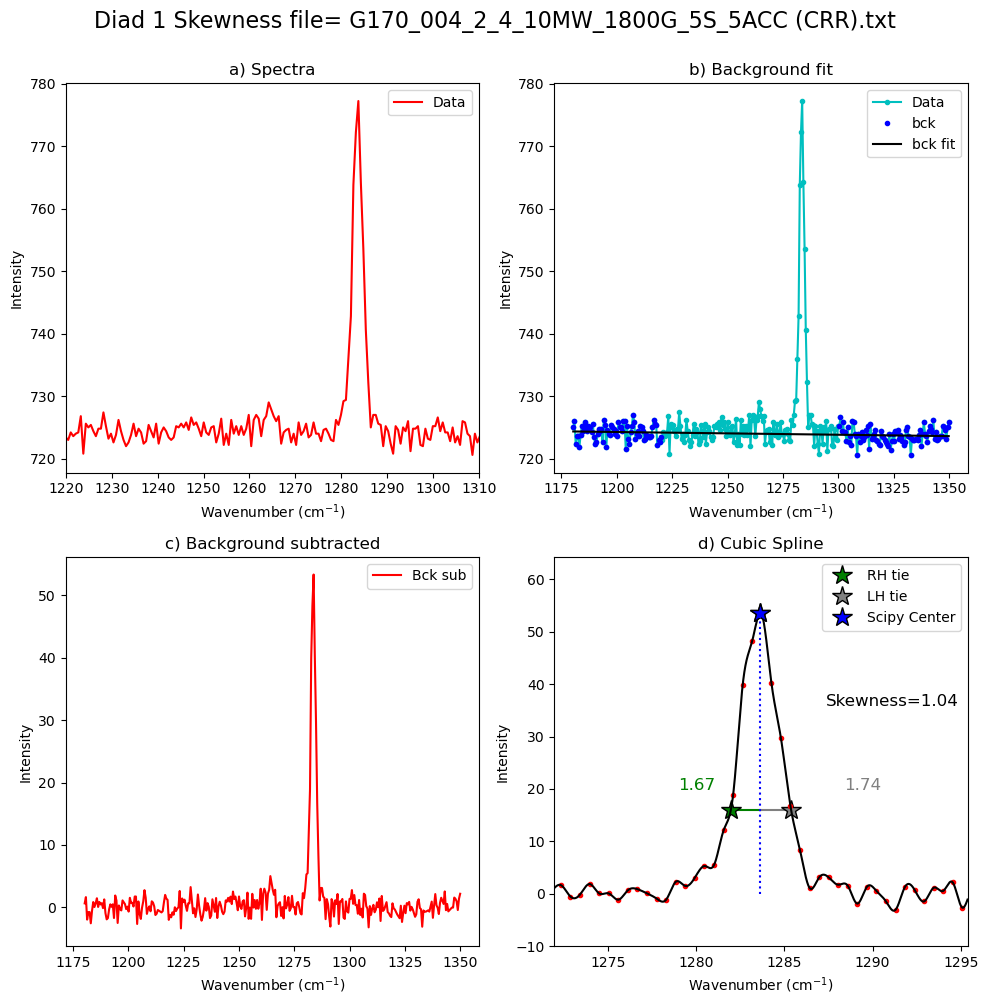

In [5]:
AR_test_diad1=pf.assess_diad1_skewness(config1=diad1_config,
int_cut_off=int_cut_off, 
skewness=skewness, path=spectra_path, filename=filename,
filetype=filetype)
AR_test_diad1



## Try these parameters for diad2

In [6]:
diad2_config=pf.diad2_fit_config()
print(diad2_config)

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, fit_gauss=False, gauss_amp=1000, diad_sigma=0.2, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, C13_sigma=0.1, C13_prom=10, sigma_allowance=10, N_poly_bck_diad2=1, lower_bck_diad2=(1300, 1360), upper_bck_diad2=(1440, 1470), diad_prom=100, HB_prom=20, x_range_baseline=75, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=20, return_other_params=False)


,Skewness_diad2,LHS_tie_diad2,RHS_tie_diad2
0,1.041725,1386.062658,1388.548875


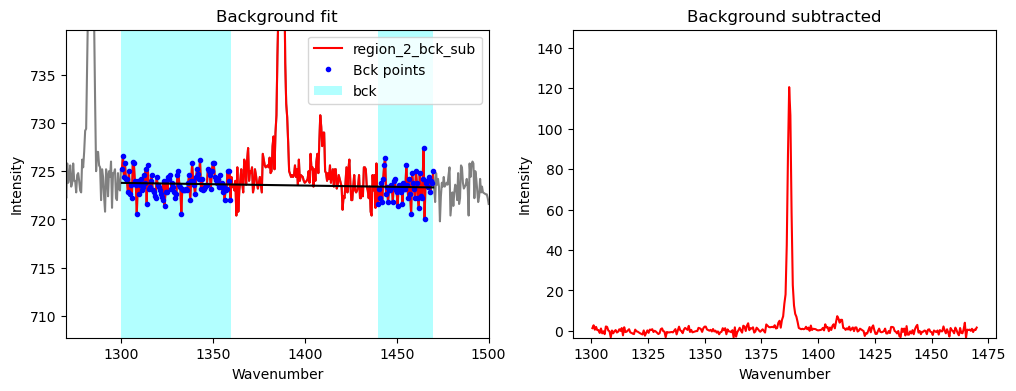

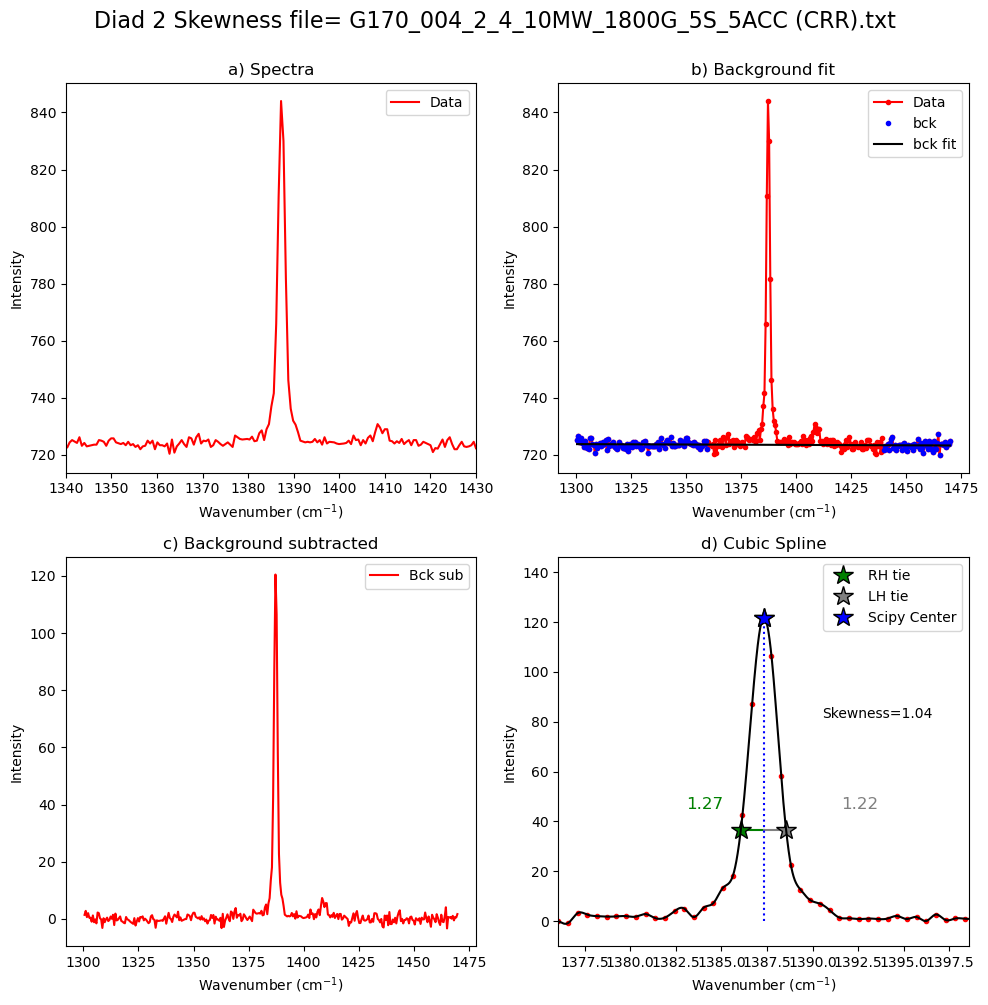

In [7]:
AR_test_diad2=pf.assess_diad2_skewness(config1=diad2_config, 
int_cut_off=int_cut_off,
skewness=skewness, path=spectra_path, filename=filename,
filetype=filetype)
AR_test_diad2

## Now lets loop through all the files

working on file #0
working on file #1
working on file #2
working on file #3
working on file #4
working on file #5


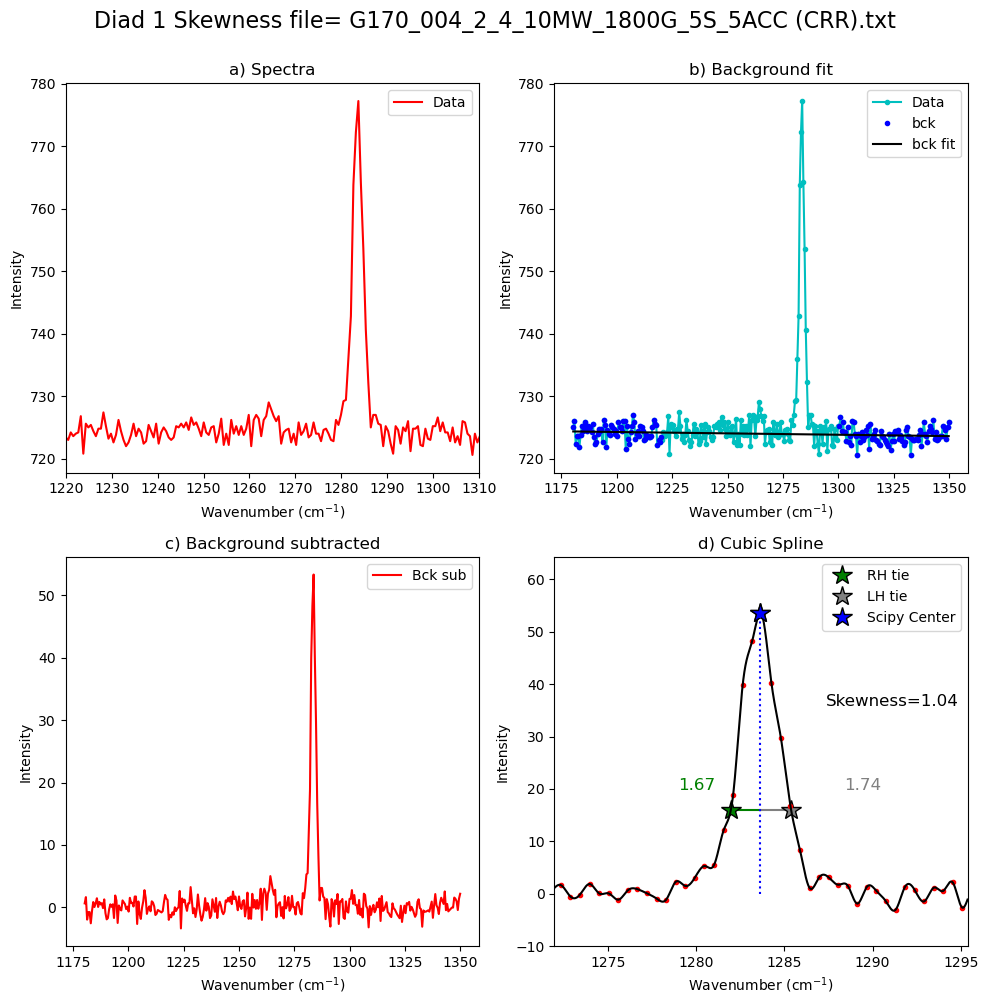

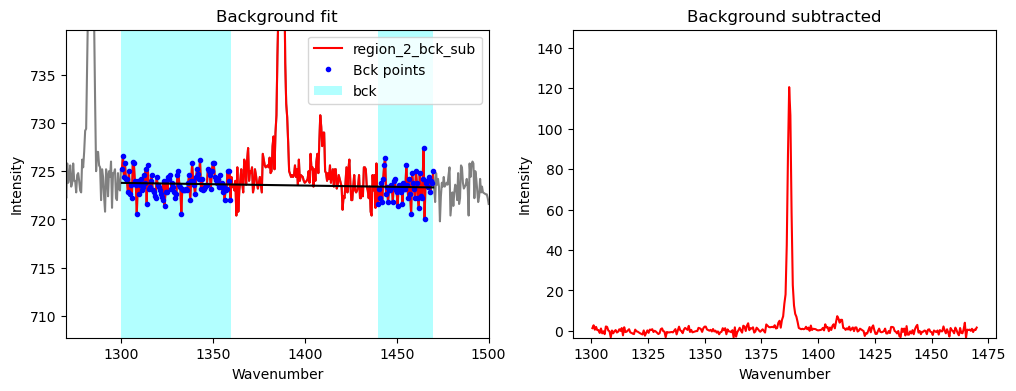

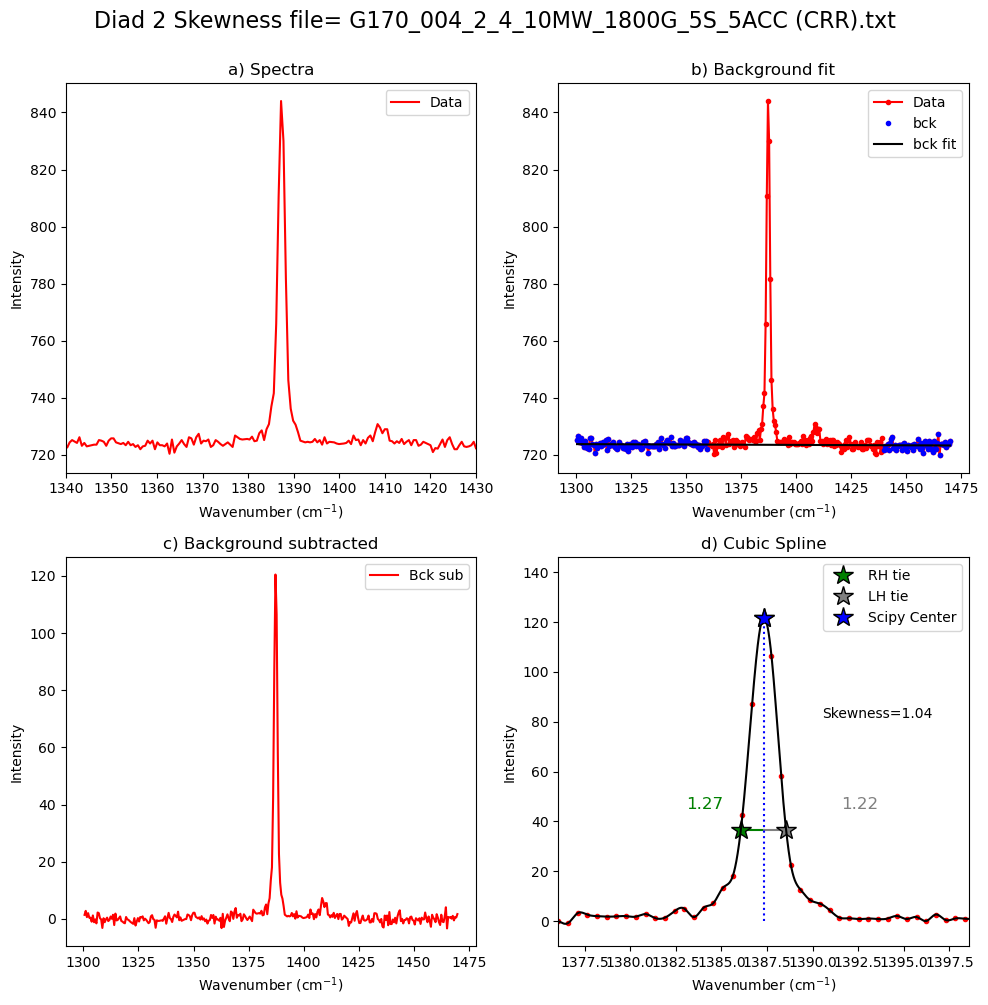

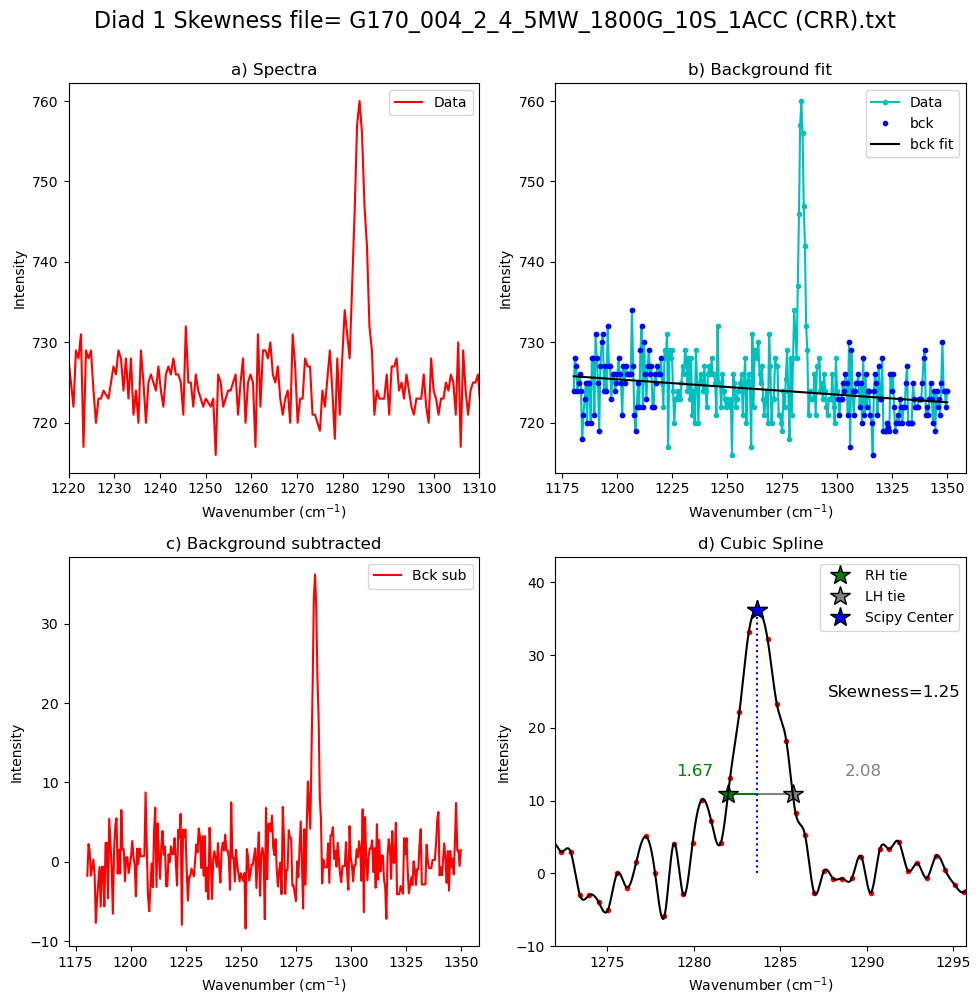

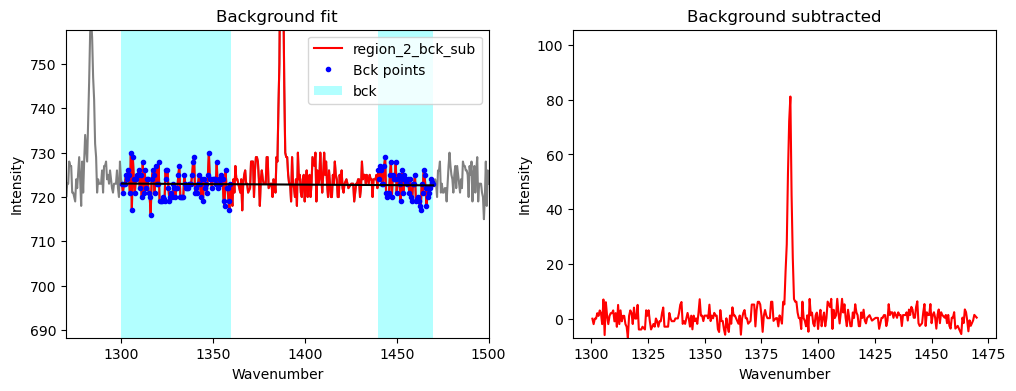

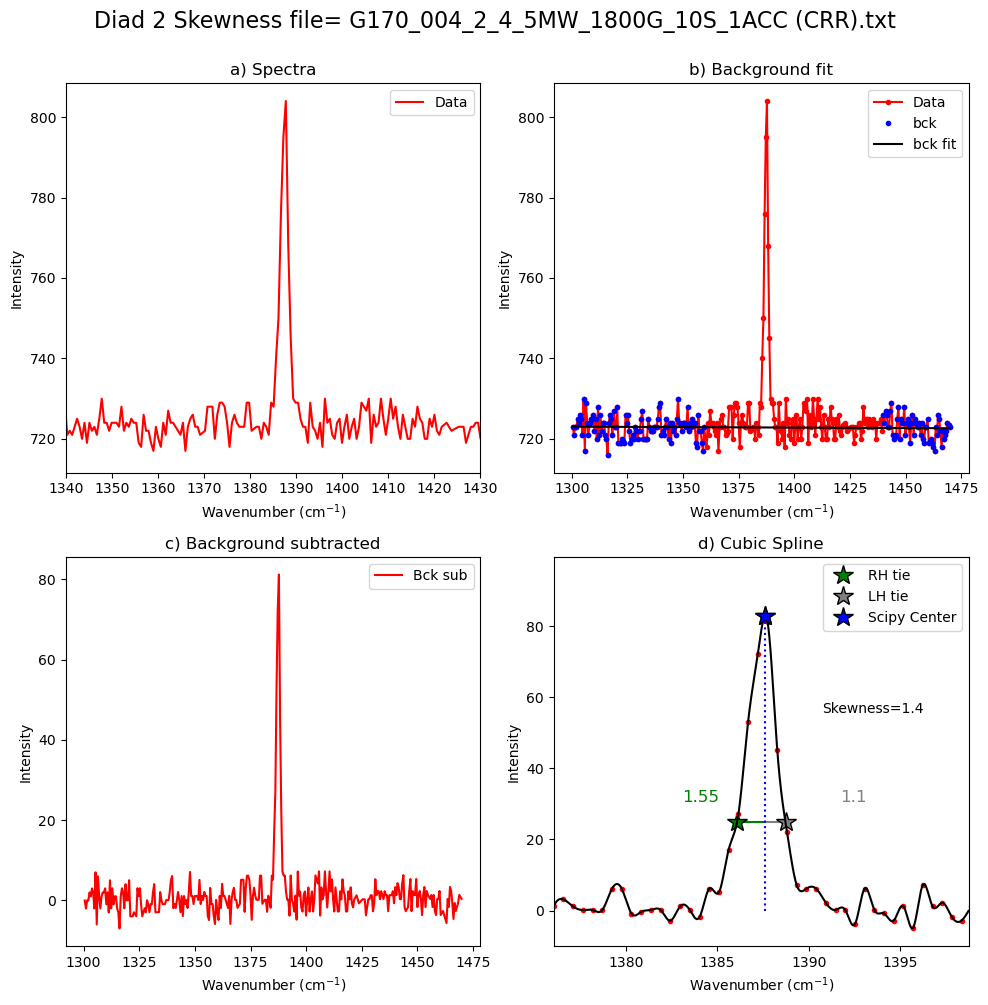

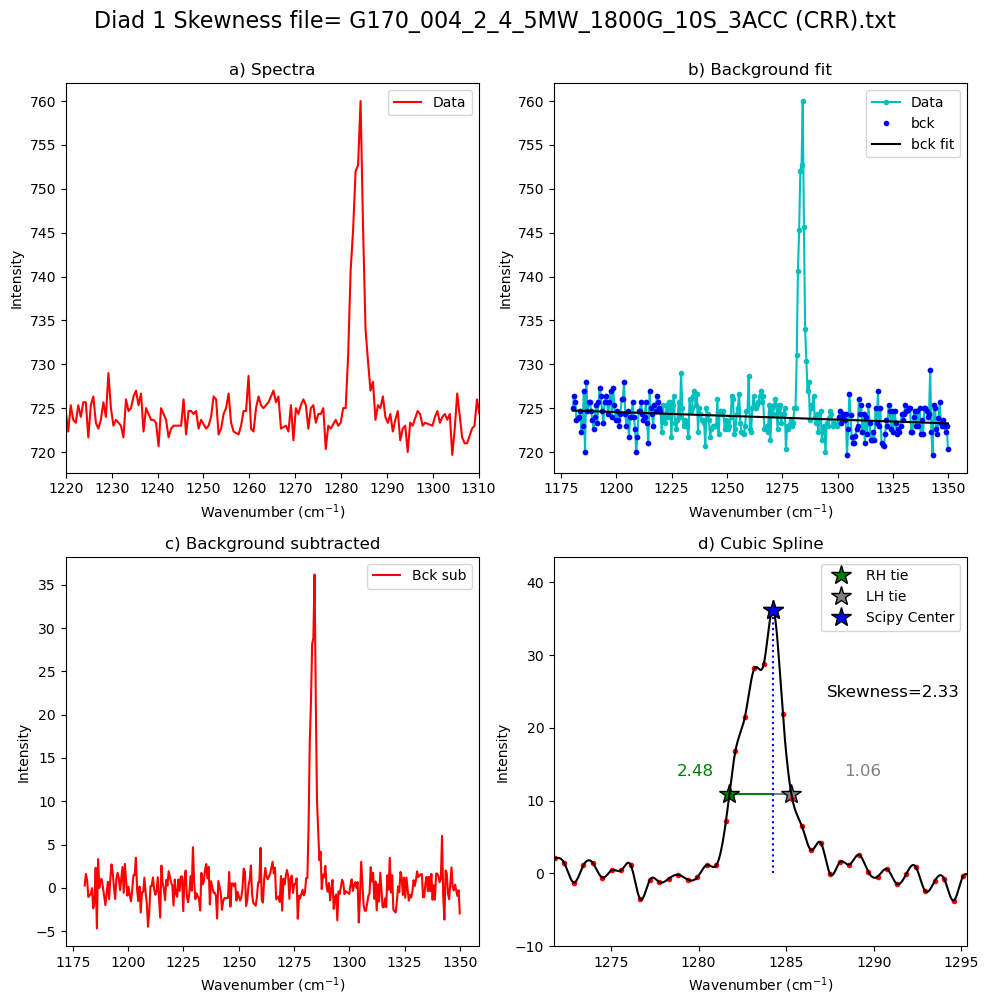

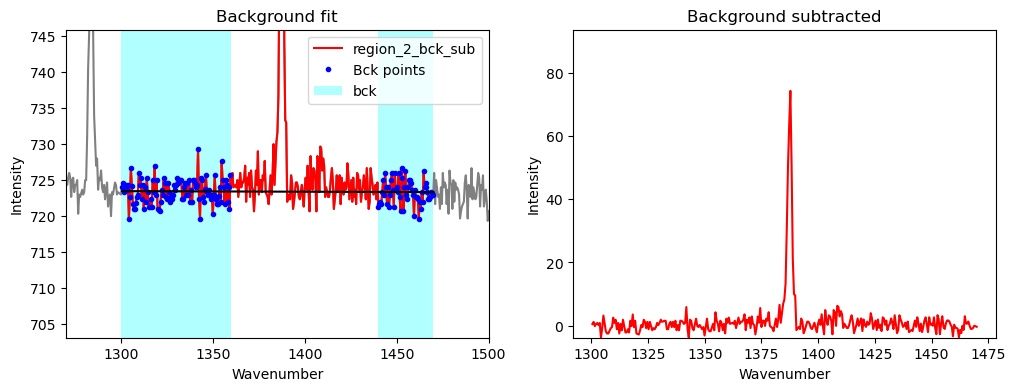

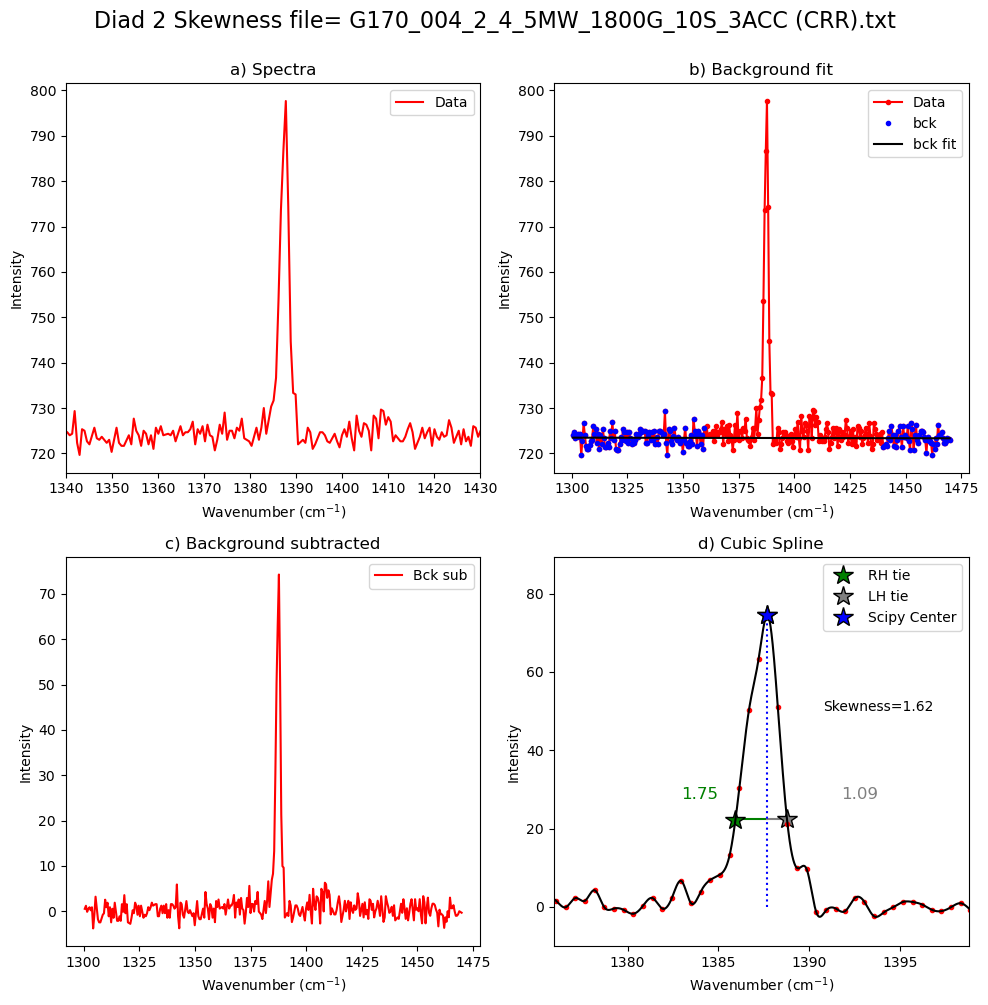

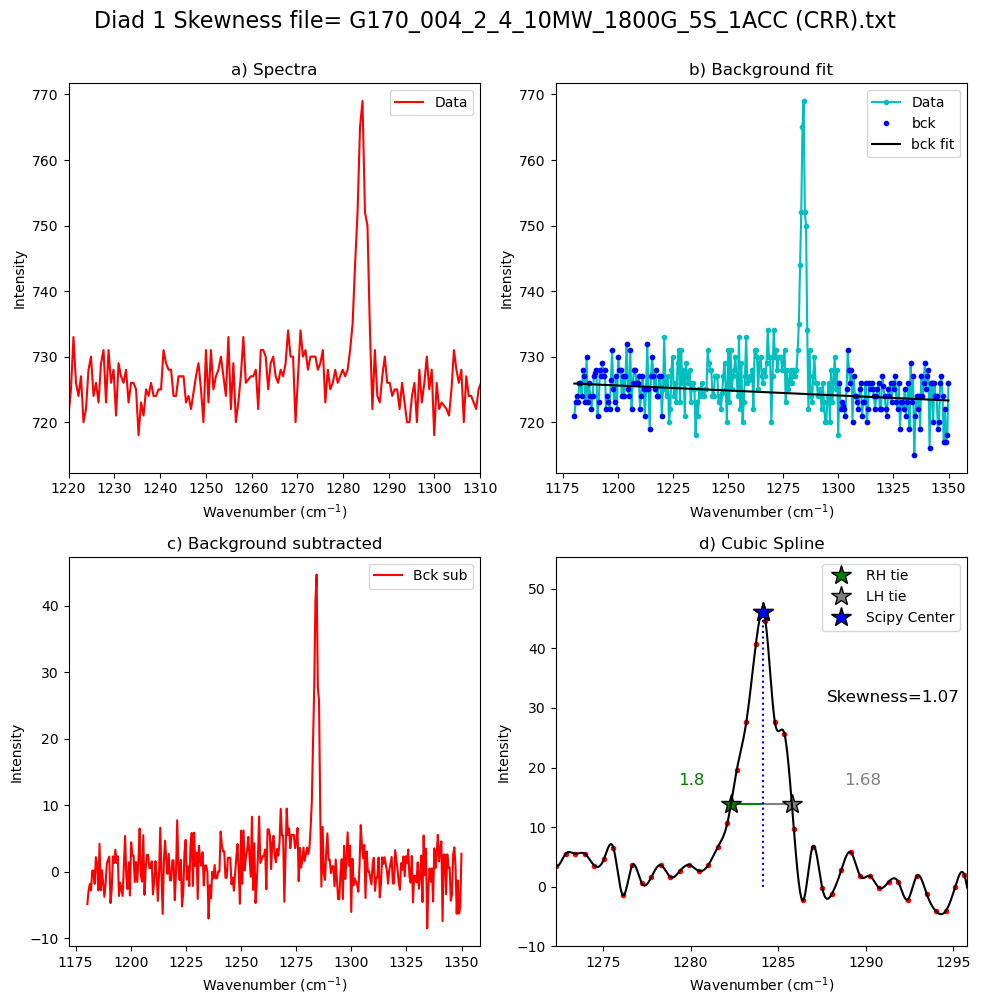

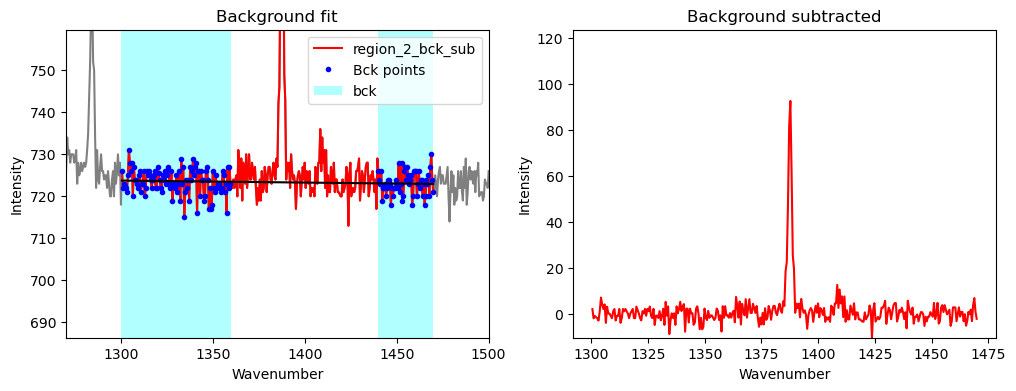

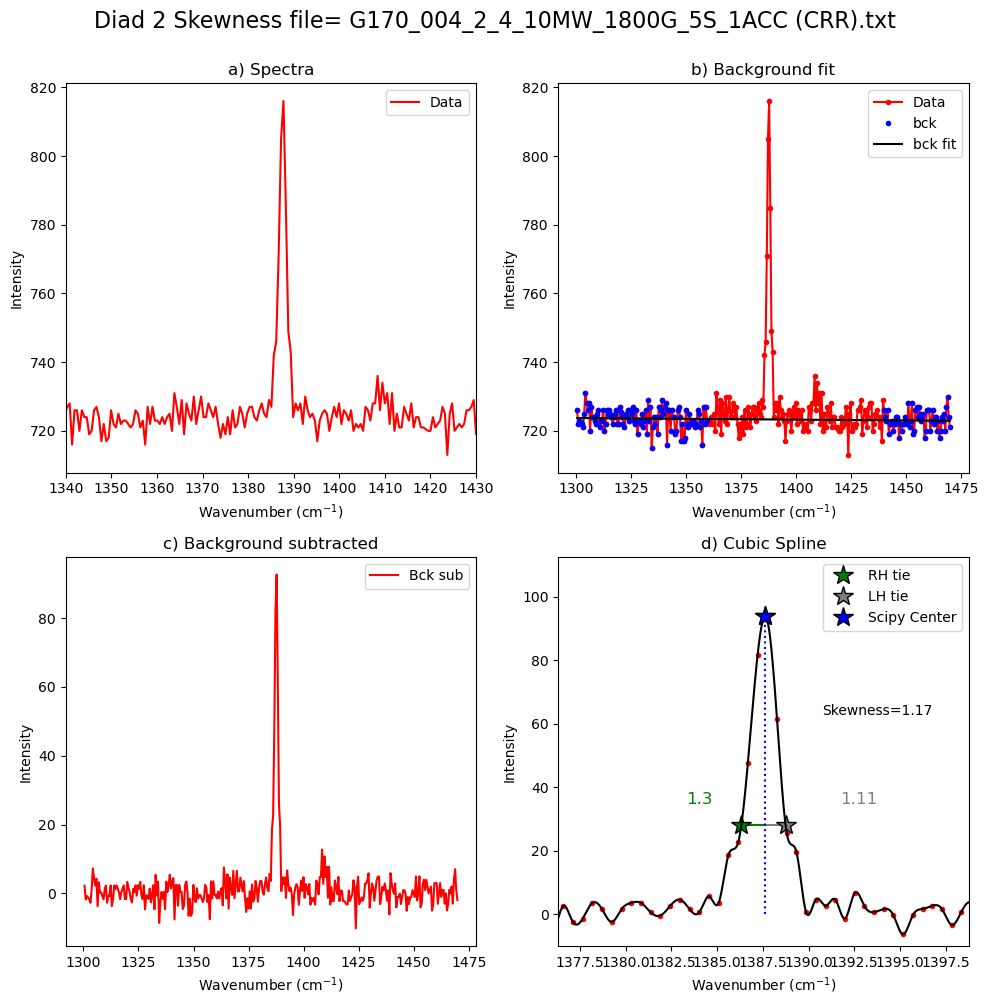

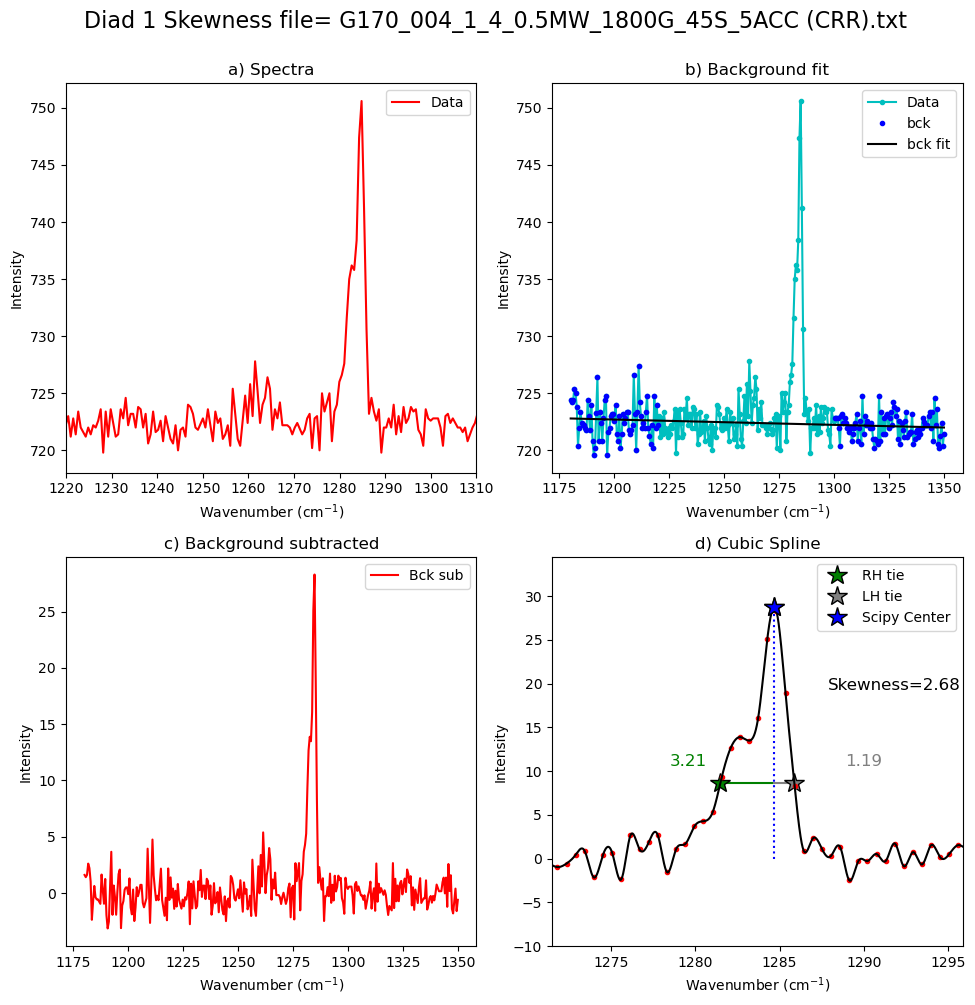

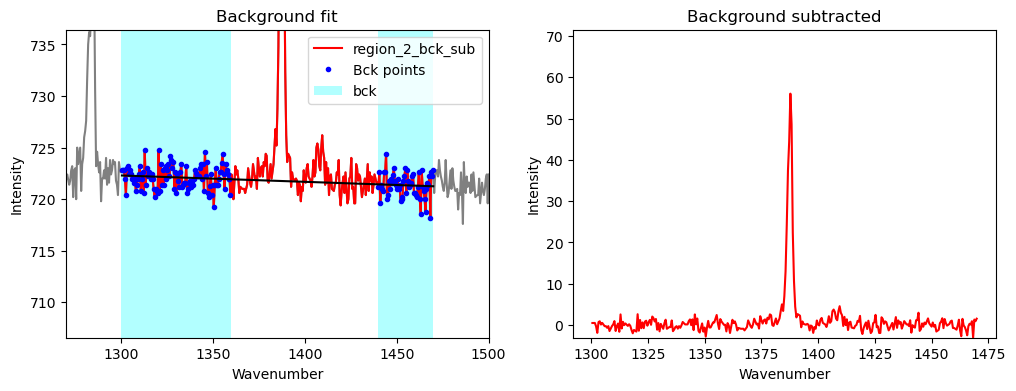

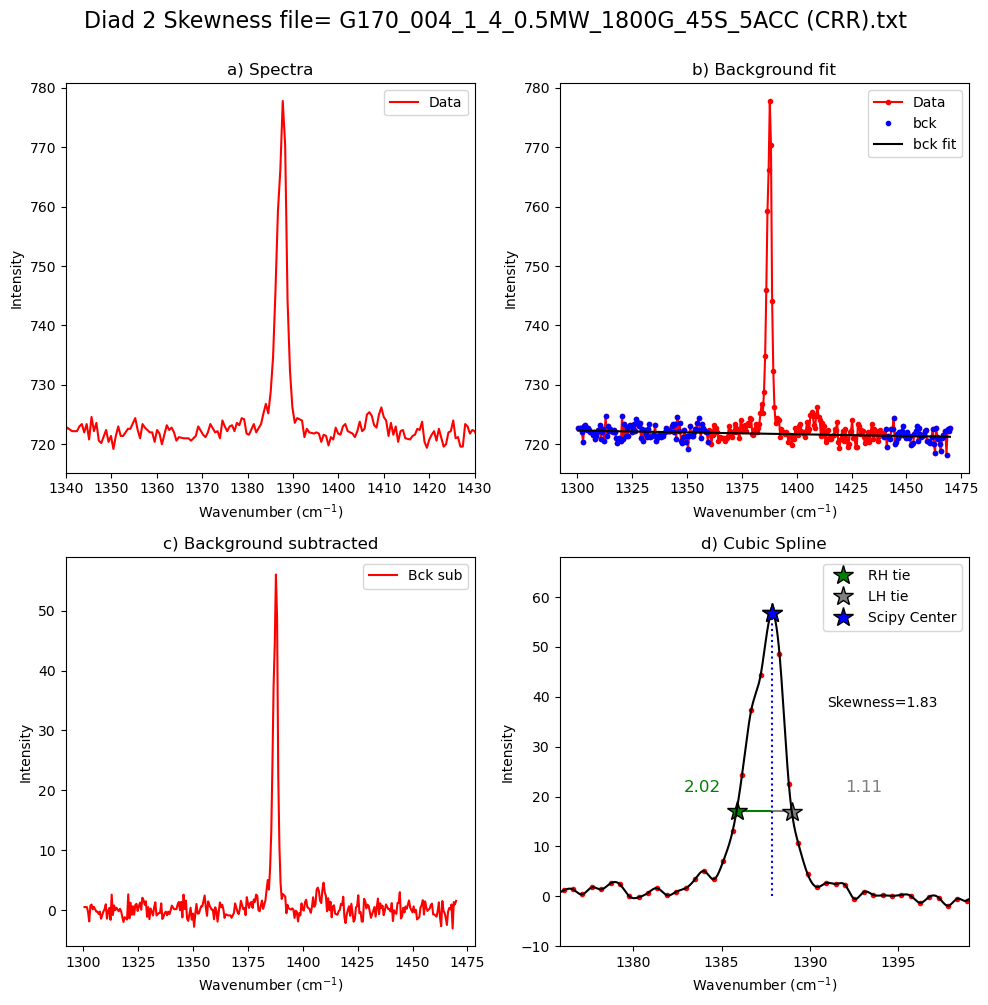

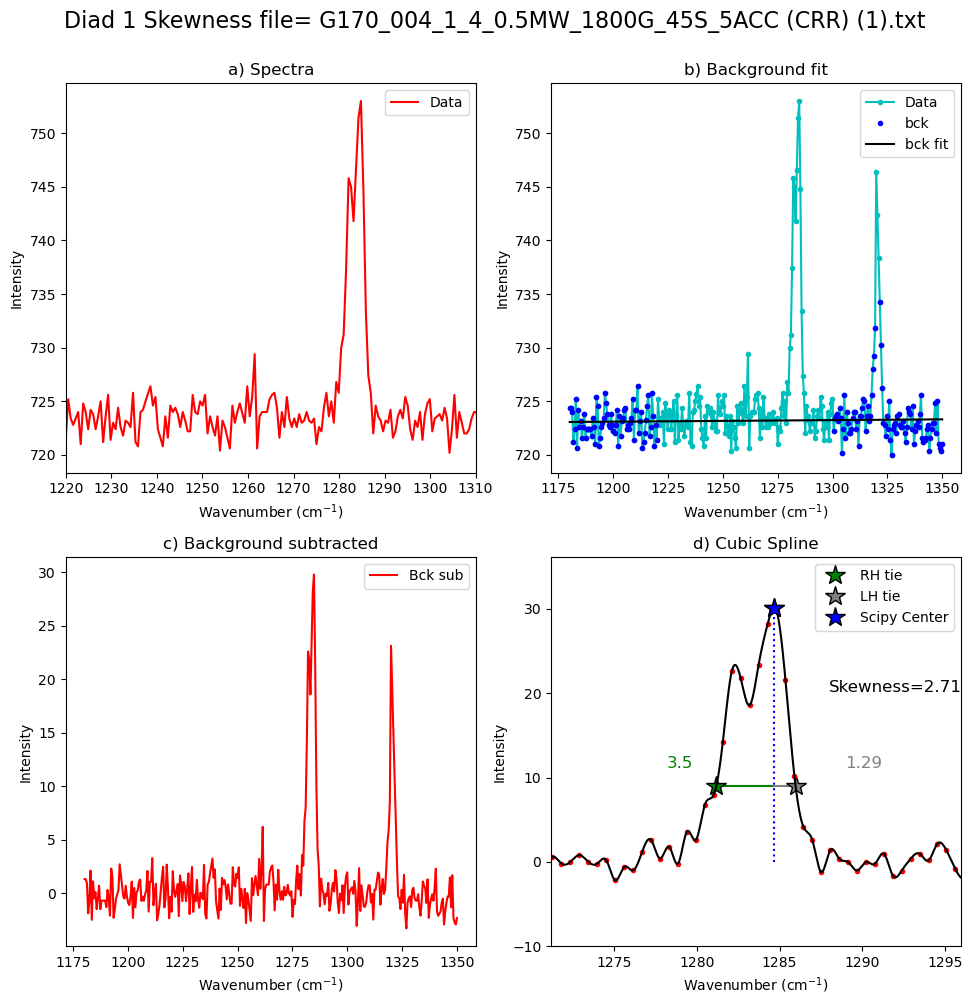

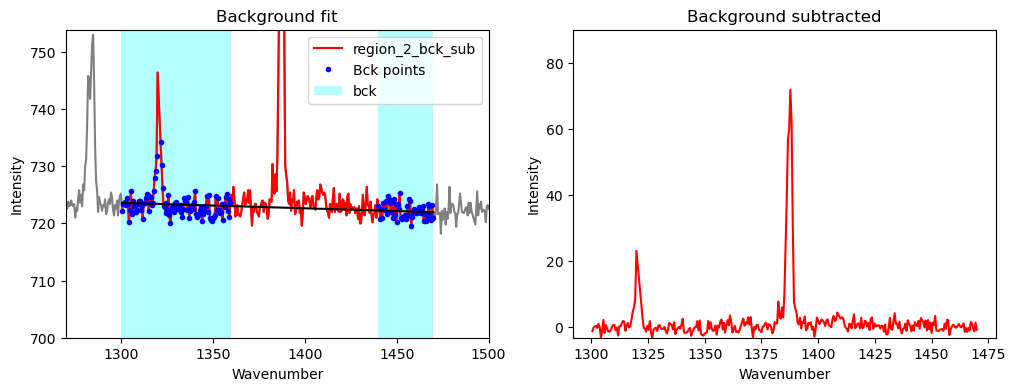

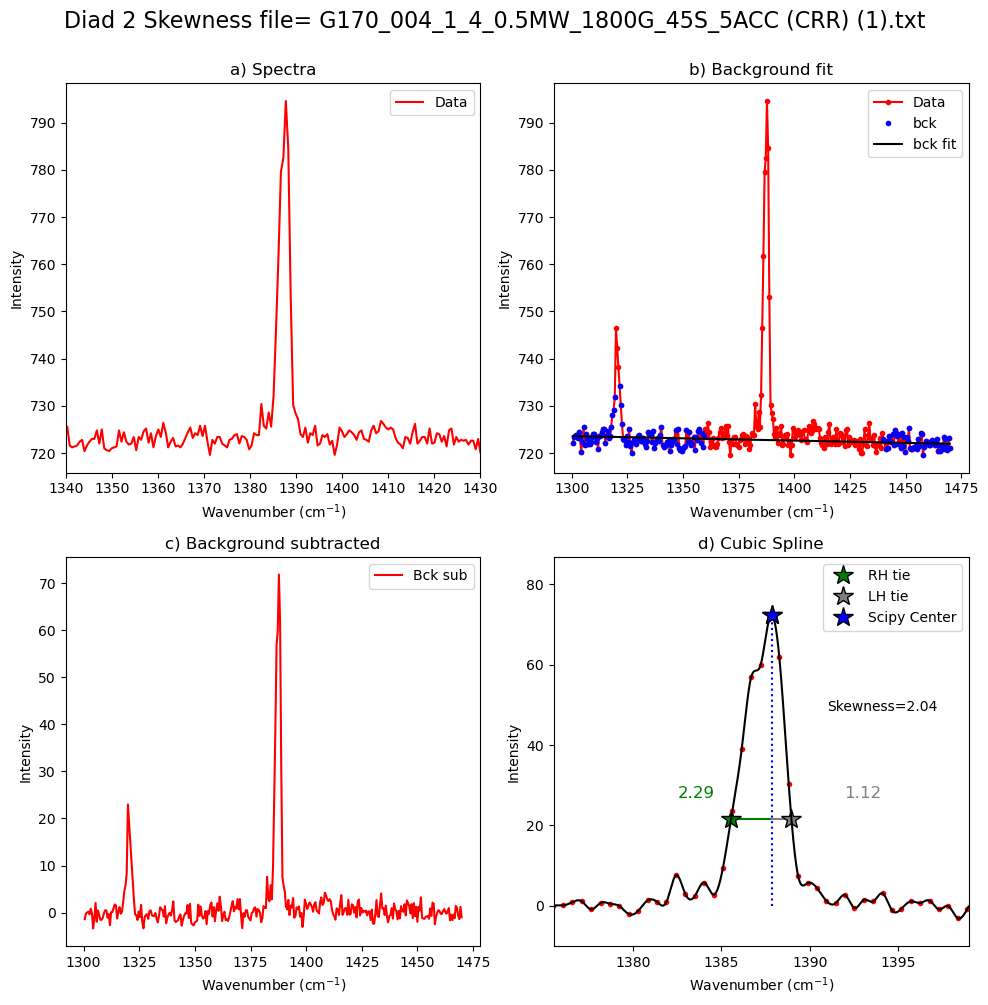

In [8]:
df_combo=pf.loop_diad_skewness(Diad_files=Diad_Files,
path=spectra_path, skewness=skewness, 
filetype=filetype,
file_ext='.txt',config_diad1=diad1_config, config_diad2=diad2_config, 
int_cut_off=0.3)

Text(0, 0.5, 'Skewness Diad 2')

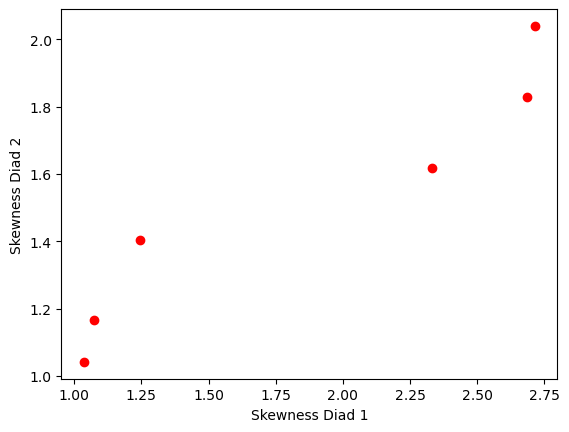

In [10]:
import Thermobar as pt
plt.plot(df_combo['Skewness_diad1'],
         df_combo['Skewness_diad2'],
         'or')
plt.xlabel('Skewness Diad 1')
plt.ylabel('Skewness Diad 2')



In [ ]:
df_combo